# UPDATE: 26.03.2021

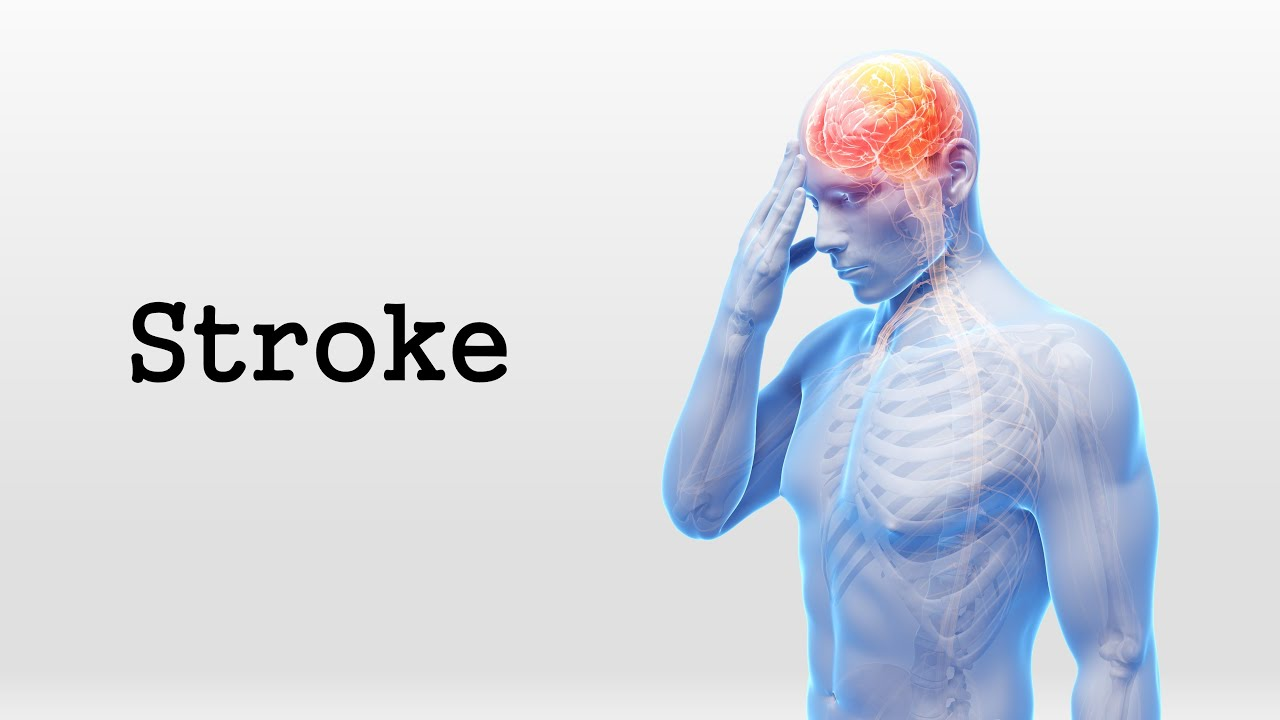

# Introduction
In this notebook you will see EDA, learn how to create new features and choose the best ones, how to prepare data for modeling, how to use SMOTE Techniques, and see 102 predicts.

### If you like my work then please upvote and write your opinion.

# Import Libs

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
import pandas_profiling as pdp

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import pandas_profiling as pp



# Data loading and overview

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df = df.drop_duplicates()
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [6]:
df.dropna(inplace = True)

In [7]:
for i in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print(df[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


# EDA

In [8]:
barplot_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
countplot_cols = ['heart_disease', 'hypertension']

In [10]:
boxplot_cols = ['age','avg_glucose_level', 'bmi']

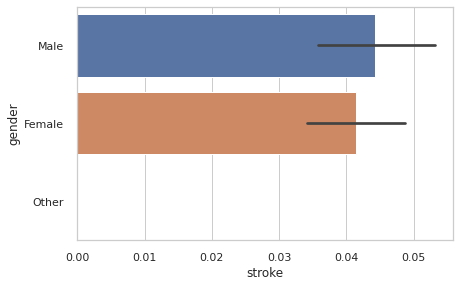

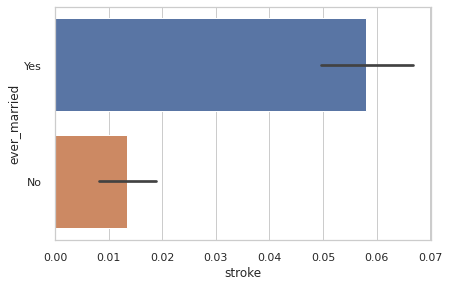

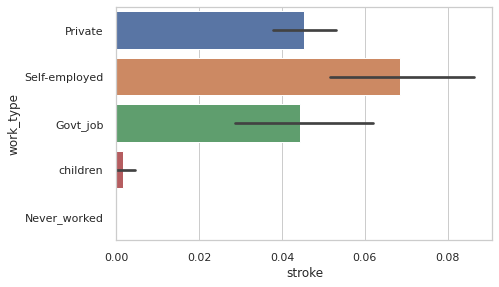

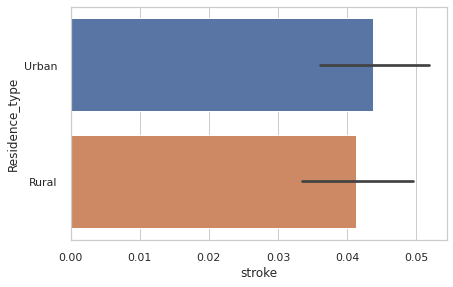

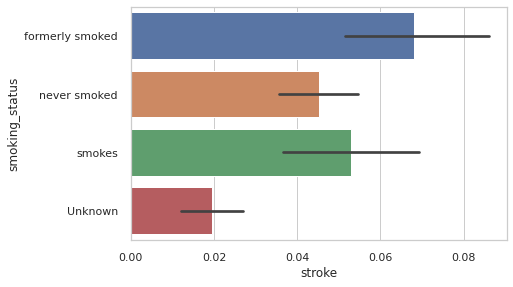

In [11]:
for i, column in enumerate(barplot_cols):
    sns.barplot(x='stroke', y=column, data=df)
    plt.show()

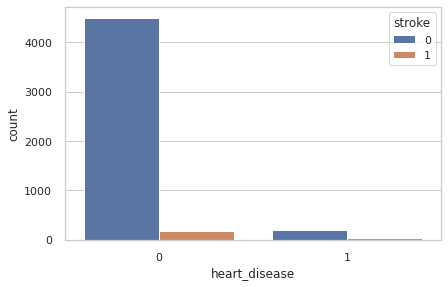

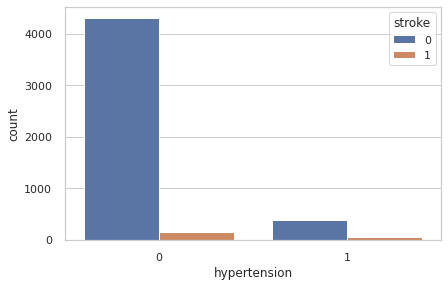

In [12]:
for i, column in enumerate(countplot_cols):
    sns.countplot(x=column, hue = 'stroke', data=df)
    plt.show()

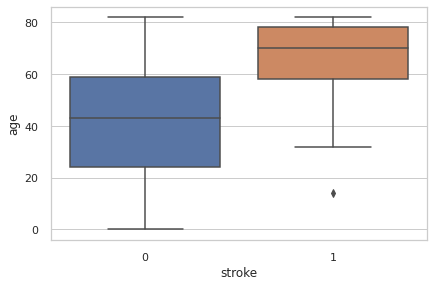

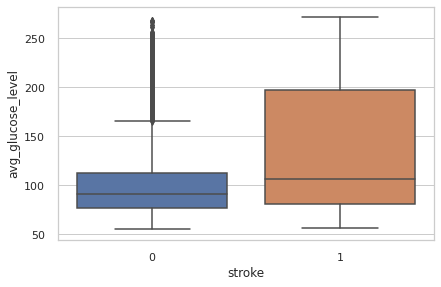

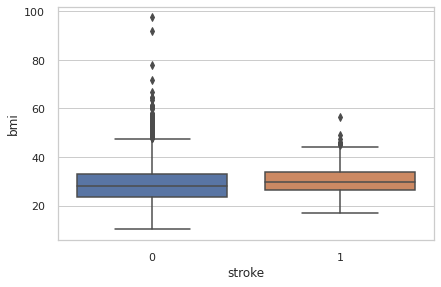

In [13]:
for i, column in enumerate(boxplot_cols):
    sns.boxplot(x='stroke', y=column, data=df)
    plt.show()

<AxesSubplot:ylabel='age'>

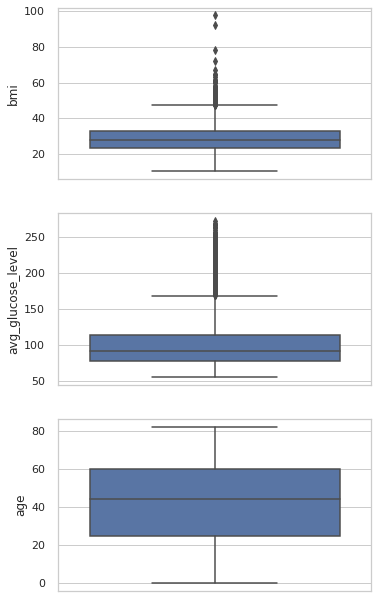

In [14]:
fig, axes = plt.subplots(nrows = 3, ncols =1 , figsize = (5, 10))
sns.boxplot(y = 'bmi', data = df, ax=axes[0])
sns.boxplot(y = 'avg_glucose_level', data = df, ax=axes[1])
sns.boxplot(y = 'age', data = df, ax=axes[2])

# Feature Engineering

In [15]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df = df.drop('id', axis = 1)
print('Encoding was successful ')

Encoding was successful 


In [16]:
replace_values = {'Unknown': 'never smoked',
                 'formerly smoked': 'smokes'}

df = df.replace({'smoking_status': replace_values})
print('Replace was successfully')

Replace was successfully


In [17]:
# Create new features

def feature_creation(df):
    df['age1'] = np.log(df['age'])
    df['age2'] = np.sqrt(df['age'])
    df['age3'] = df['age']**3
    df['bmi1'] = np.log(df['bmi'])
    df['bmi2'] = np.sqrt(df['bmi'])
    df['bmi3'] = df['bmi']**3
    df['avg_glucose_level1'] = np.log(df['avg_glucose_level'])
    df['avg_glucose_level2'] = np.sqrt(df['avg_glucose_level'])
    df['avg_glucose_level3'] = np.log(df['avg_glucose_level'])*3
    for i in ['gender', 'age1', 'age2', 'age3', 'hypertension', 'heart_disease', 'ever_married', 'work_type']:
        for j in ['Residence_type', 'avg_glucose_level1','avg_glucose_level2', 'avg_glucose_level3', 'bmi1', 'bmi2', 'bmi3','smoking_status']:
            df[i+'_'+j] = df[i].astype('str')+'_'+df[j].astype('str')
    return df

df = feature_creation(df)

In [18]:
# Determination categorical features

categorical_columns = []
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)

categorical_columns

['gender_Residence_type',
 'gender_avg_glucose_level1',
 'gender_avg_glucose_level2',
 'gender_avg_glucose_level3',
 'gender_bmi1',
 'gender_bmi2',
 'gender_bmi3',
 'gender_smoking_status',
 'age1_Residence_type',
 'age1_avg_glucose_level1',
 'age1_avg_glucose_level2',
 'age1_avg_glucose_level3',
 'age1_bmi1',
 'age1_bmi2',
 'age1_bmi3',
 'age1_smoking_status',
 'age2_Residence_type',
 'age2_avg_glucose_level1',
 'age2_avg_glucose_level2',
 'age2_avg_glucose_level3',
 'age2_bmi1',
 'age2_bmi2',
 'age2_bmi3',
 'age2_smoking_status',
 'age3_Residence_type',
 'age3_avg_glucose_level1',
 'age3_avg_glucose_level2',
 'age3_avg_glucose_level3',
 'age3_bmi1',
 'age3_bmi2',
 'age3_bmi3',
 'age3_smoking_status',
 'hypertension_Residence_type',
 'hypertension_avg_glucose_level1',
 'hypertension_avg_glucose_level2',
 'hypertension_avg_glucose_level3',
 'hypertension_bmi1',
 'hypertension_bmi2',
 'hypertension_bmi3',
 'hypertension_smoking_status',
 'heart_disease_Residence_type',
 'heart_disease_a

In [19]:
# Encoding categorical features

for col in categorical_columns:
    if col in df.columns:
        #le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
print('Encoding was successfull')

Encoding was successfull


In [20]:
# the number of features that we need to choose as a result
num_features_opt = 25 

# the somewhat excessive number of features, which we will choose at each stage
num_features_max = 35   

features_best = []

In [21]:
X_train = df.drop('stroke', axis = 1).copy()
y_train = df.stroke.copy()

## Feature Selection with Pearson correlation

In [22]:
# Threshold for removing correlated variables
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: pink'
    else:
        style = 'background-color: green'
    return style

# Absolute value correlation matrix
corr_matrix = df.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.style.format("{:.2f}").applymap(highlight)

In [23]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop features with correlation above the threshold
features_filtered = df.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])

# Add filtered features
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  38


## Feature selection by the SelectFromModel with LinearSVC

In [24]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train)
X_selected_df = pd.DataFrame(X_new, columns=[X_train.columns[i] for i in range(len(X_train.columns)) if model.get_support()[i]])

# add features
features_best.append(X_selected_df.columns.tolist())

## Feature selection with Lasso

In [25]:
lasso = LassoCV(cv=3).fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X_train)
X_selected_df = pd.DataFrame(X_new, columns=[X_train.columns[i] for i in range(len(X_train.columns)) if model.get_support()[i]])

# add features
features_best.append(X_selected_df.columns.tolist())

## Feature selection by the SelectKBest with Chi-2

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(abs(X_train), y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

# add features
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

                    Feature         Score
12                     age3  5.930483e+07
38  age2_avg_glucose_level3  2.220824e+05
36  age2_avg_glucose_level1  2.220824e+05
30  age1_avg_glucose_level3  2.217293e+05
28  age1_avg_glucose_level1  2.217293e+05
..                      ...           ...
14                     bmi2  1.098507e+00
19    gender_Residence_type  3.456933e-01
13                     bmi1  3.034374e-01
0                    gender  1.324597e-01
6            Residence_type  8.799864e-02

[83 rows x 2 columns]


## Feature selection by the RFE with Logistic Regression

In [27]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
rfe_feature = X_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 83 features.
Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.
Fitting estimator with 43 features.
35 selected features


In [28]:
# add features
features_best.append(rfe_feature)

## Feature selection by the RFE with Random Forest

In [29]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200),
                threshold='1.25*median')

In [30]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

17 selected features


In [31]:
# add features
features_best.append(embeded_rf_feature)

## Feature selection by the VarianceThreshhold

In [32]:
# Check whether all features have a sufficiently different meaning
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(df))
features_best.append(list(np.array(df.columns)[selector.get_support(indices=False)]))

## Selection the best features

In [33]:
# Show our best features
features_best

[['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status',
  'stroke',
  'age1',
  'bmi3',
  'gender_Residence_type',
  'gender_avg_glucose_level1',
  'gender_avg_glucose_level2',
  'gender_bmi3',
  'gender_smoking_status',
  'age3_Residence_type',
  'hypertension_Residence_type',
  'hypertension_avg_glucose_level1',
  'hypertension_avg_glucose_level2',
  'hypertension_bmi1',
  'hypertension_bmi3',
  'hypertension_smoking_status',
  'heart_disease_Residence_type',
  'heart_disease_avg_glucose_level1',
  'heart_disease_avg_glucose_level2',
  'heart_disease_bmi1',
  'heart_disease_bmi3',
  'heart_disease_smoking_status',
  'ever_married_Residence_type',
  'ever_married_avg_glucose_level1',
  'ever_married_avg_glucose_level2',
  'ever_married_bmi3',
  'ever_married_smoking_status',
  'work_type_avg_glucose_level1',
  'work_type_avg_glucose_level2'],
 ['age',
  'avg_glucose_level',
  'bm

In [34]:
# The element is in at least one list of optimal features
main_cols_max = features_best[0]
for i in range(len(features_best)-1):
    main_cols_max = list(set(main_cols_max) | set(features_best[i+1]))
print(main_cols_max)

print('Cols:', len(main_cols_max))

['bmi', 'age3_bmi2', 'age3_avg_glucose_level2', 'age2_bmi3', 'heart_disease_Residence_type', 'age1_bmi2', 'age3_bmi1', 'avg_glucose_level2', 'work_type_Residence_type', 'bmi2', 'gender_avg_glucose_level3', 'age2_Residence_type', 'ever_married_Residence_type', 'gender_bmi3', 'hypertension_avg_glucose_level1', 'hypertension', 'heart_disease_avg_glucose_level3', 'gender_bmi2', 'work_type', 'age3_smoking_status', 'age1', 'avg_glucose_level3', 'work_type_bmi3', 'gender_smoking_status', 'ever_married_avg_glucose_level1', 'age2_smoking_status', 'age3_avg_glucose_level1', 'age3_Residence_type', 'ever_married_bmi1', 'ever_married_bmi2', 'hypertension_bmi3', 'age1_avg_glucose_level2', 'age1_smoking_status', 'work_type_bmi2', 'ever_married_smoking_status', 'hypertension_avg_glucose_level3', 'work_type_bmi1', 'bmi3', 'age2_bmi1', 'hypertension_smoking_status', 'heart_disease_avg_glucose_level1', 'age2_avg_glucose_level2', 'work_type_avg_glucose_level3', 'age1_Residence_type', 'gender_bmi1', 'bmi1'

In [35]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in df.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

,Num
ever_married_avg_glucose_level1,6
heart_disease_avg_glucose_level2,5
ever_married_bmi3,5
hypertension_avg_glucose_level1,5
age2_bmi2,5
gender_bmi3,5
gender_avg_glucose_level2,5
gender_avg_glucose_level1,5
ever_married_avg_glucose_level2,5
hypertension_avg_glucose_level2,5


In [36]:
# Select only our best features that are included in num_features_opt
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'stroke' in main_cols:
    main_cols.append('stroke')
print(main_cols)

print("Quantity:", len(main_cols))

['ever_married_avg_glucose_level1', 'avg_glucose_level', 'gender_avg_glucose_level1', 'gender_avg_glucose_level2', 'gender_bmi3', 'age2_bmi2', 'hypertension_avg_glucose_level1', 'hypertension_avg_glucose_level2', 'heart_disease_avg_glucose_level2', 'ever_married_avg_glucose_level2', 'ever_married_bmi3', 'work_type_avg_glucose_level2', 'bmi', 'gender_avg_glucose_level3', 'age1_avg_glucose_level1', 'age1_avg_glucose_level3', 'age1_smoking_status', 'age2_bmi1', 'age2_smoking_status', 'age3_Residence_type', 'age3_bmi1', 'hypertension_avg_glucose_level3', 'hypertension_bmi1', 'heart_disease_avg_glucose_level1', 'heart_disease_avg_glucose_level3', 'stroke']
Quantity: 26


# Preparing to modeling

In [37]:
# show best features

df[main_cols].head()

,ever_married_avg_glucose_level1,avg_glucose_level,gender_avg_glucose_level1,gender_avg_glucose_level2,gender_bmi3,age2_bmi2,hypertension_avg_glucose_level1,hypertension_avg_glucose_level2,heart_disease_avg_glucose_level2,ever_married_avg_glucose_level2,...,age1_smoking_status,age2_bmi1,age2_smoking_status,age3_Residence_type,age3_bmi1,hypertension_avg_glucose_level3,hypertension_bmi1,heart_disease_avg_glucose_level1,heart_disease_avg_glucose_level3,stroke
0,4190,228.69,4252,3213,592,3561,3444,1366,3805,2630,...,257,3561,257,113,2178,3444,239,3906,3906,1
2,3261,105.92,3641,2602,533,4136,2305,227,3702,1701,...,310,4136,310,166,3294,2305,198,3803,3803,1
3,3815,171.23,2197,700,220,2507,3130,1052,1089,2255,...,187,2507,191,37,301,3130,217,3224,3224,1
4,3822,174.12,2203,706,59,4044,3831,3629,1098,2262,...,306,4044,306,156,3084,3831,429,3233,3233,1
5,3865,186.21,4074,3035,487,4223,3167,1089,1144,2305,...,313,4223,317,169,3337,3167,163,3279,3279,1


In [38]:
X = df[main_cols].drop('stroke', axis = 1)
y = df[main_cols].stroke

In [39]:
#scaling
rs = RobustScaler()

X_rs = pd.DataFrame(rs.fit_transform(X), columns = X.columns)

In [40]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rs, y, test_size=0.2, random_state=42)

# SMOTE Technique

In [41]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print(y_train_sm.value_counts())

0    3771
1    3771
Name: stroke, dtype: int64


In [42]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print(y_train_ada.value_counts())

0    3771
1    3727
Name: stroke, dtype: int64


In [43]:
from imblearn.combine import SMOTETomek
smtom = SMOTETomek()
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)
print(y_train_smtom.value_counts())

0    3742
1    3742
Name: stroke, dtype: int64


In [44]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)
print(y_train_smenn.value_counts())

1    3564
0    3112
Name: stroke, dtype: int64


In [45]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(y_train_rus.value_counts())

0    156
1    156
Name: stroke, dtype: int64


# Modeling

In [46]:
def evaluate_model(clf, X_train,X_test, y_train, y_test, model_name, sample_type):
    print('--------------------------------------------')
    print('Model ', model_name)
    print('Data Type ', sample_type)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    f1_train = f1_score(y_train, y_pred_train, average = 'binary')
    recall_train = recall_score(y_train, y_pred_train, average = 'binary')
    precision_train = precision_score(y_train, y_pred_train,  average = 'binary')
    f1_test = f1_score(y_test, y_pred, average='binary')
    recall_test = recall_score(y_test, y_pred, average='binary')
    precision_test = precision_score(y_test, y_pred, average='binary')
    print('TRAIN:', classification_report(y_train, y_pred_train))
    print('TRAIN Accuracy:', accuracy_score(y_train, y_pred_train))
    print("TRAIN: F1 Score ", f1_train)
    print("TRAIN: Recall ", recall_train)
    print("TRAIN: Precision ", precision_train)
    print('==================================================================')
    print('TEST Accuracy:', classification_report(y_test, y_pred))
    print('TEST:', accuracy_score(y_test, y_pred))
    print("TEST: F1 Score ", f1_test)
    print("TEST: Recall ", recall_test)
    print("TEST: Precision ", precision_test)
    return [model_name, sample_type, 
            f1_test, f1_train, 
            recall_test, recall_train, 
            precision_test, precision_train,
            accuracy_test, accuracy_train]

In [47]:
models = {
    'Decision Trees': DecisionTreeClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
    'Linear SVC':LinearSVC(random_state=0),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=42),
    'Stochastic Gradient Descent':SGDClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': SVC(),
    'MLP Classifier': MLPClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gaussian Process Classification': GaussianProcessClassifier()
}

In [48]:
sampled_data = {
    'ACTUAL':[X_train, y_train],
    'SMOTE':[X_train_sm, y_train_sm],
    'ADASYN':[X_train_ada, y_train_ada],
    'SMOTE_TOMEK':[X_train_smtom, y_train_smtom],
    'SMOTE_ENN':[X_train_smenn, y_train_smenn],
    'UNDERSAMPLING': [X_train_rus, y_train_rus]
}

In [49]:
%%time

output = []
for model_k, model_clf in models.items():
    for data_type, data in sampled_data.items():
        model_clf.fit(data[0], data[1])
        output.append(evaluate_model(model_clf, X_train, X_test, y_train, y_test, model_k, data_type))


--------------------------------------------
Model  Decision Trees
Data Type  ACTUAL
TRAIN:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00       156

    accuracy                           1.00      3927
   macro avg       1.00      1.00      1.00      3927
weighted avg       1.00      1.00      1.00      3927

TRAIN Accuracy: 1.0
TRAIN: F1 Score  1.0
TRAIN: Recall  1.0
TRAIN: Precision  1.0
TEST Accuracy:               precision    recall  f1-score   support

           0       0.95      0.95      0.95       929
           1       0.16      0.15      0.16        53

    accuracy                           0.91       982
   macro avg       0.56      0.55      0.55       982
weighted avg       0.91      0.91      0.91       982

TEST: 0.9114052953156823
TEST: F1 Score  0.1553398058252427
TEST: Recall  0.1509433962264151
TEST: Precision  0.16
------------------------------------------

# Result

In [50]:
result = pd.DataFrame(output, columns=['Model', 'DataType',
                                       'F1_test','F1_train', 
                                       'Recall_test','Recall_train', 
                                       'Precision_test', 'Precision_train',
                                       'Accuracy_test', 'Accuracy_train'])
pd.set_option('display.max_rows', None)

#result = result[result['F1_test']!=0]
result.sort_values(by="F1_test", ascending=False)

,Model,DataType,F1_test,F1_train,Recall_test,Recall_train,Precision_test,Precision_train,Accuracy_test,Accuracy_train
90,Naive Bayes,ACTUAL,0.266667,0.194577,0.830189,0.782051,0.158845,0.111111,0.753564,0.742806
27,Stochastic Gradient Descent,SMOTE_TOMEK,0.250871,0.199825,0.679245,0.730769,0.153846,0.115736,0.781059,0.767507
93,Naive Bayes,SMOTE_TOMEK,0.244681,0.178190,0.867925,0.801282,0.142415,0.100241,0.710794,0.706392
51,Logistic Regression,SMOTE_TOMEK,0.240964,0.192429,0.754717,0.782051,0.143369,0.109712,0.743381,0.739241
91,Naive Bayes,SMOTE,0.240838,0.175809,0.867925,0.801282,0.139818,0.098736,0.704684,0.701553
95,Naive Bayes,UNDERSAMPLING,0.238579,0.174089,0.886792,0.826923,0.137830,0.097285,0.694501,0.688312
49,Logistic Regression,SMOTE,0.238372,0.190114,0.773585,0.801282,0.140893,0.107852,0.733198,0.728801
92,Naive Bayes,ADASYN,0.238342,0.172958,0.867925,0.807692,0.138138,0.096849,0.700611,0.693150
94,Naive Bayes,SMOTE_ENN,0.236504,0.173442,0.867925,0.820513,0.136905,0.096970,0.697556,0.689330
20,AdaBoost Classifier,ADASYN,0.236422,0.216973,0.698113,0.794872,0.142308,0.125633,0.756619,0.772091


# Write your opinion. Thanks!